In [41]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

In [57]:
path = "/work/cms16/sb95/Polymer_collapse/"
rg = {}
kavals=[]
chivals=[]
ecutvals=[]
for dir in os.listdir(path):
    if 'output' in dir:
        try:
            ka=float(dir.split('ka')[1].split('_')[0])
            chi=float(dir.split('chi')[1].split('_')[0])
            ecut=float(dir.split('ecut')[1].split('_')[0])
            
            # print(dir, ka, ecut, chi)
            # print(os.path.join(path, dir, f"RG-{ka}-{ecut}-{chi}.txt"))
            rgval=np.loadtxt(os.path.join(path, dir, f"RG-{ka:.2f}-{ecut:.2f}-{chi:.2f}.txt"))
        except(FileNotFoundError): 
            print(dir)
            rgval=np.array([0.0])
            pass
        
        rg[f"{ka:.2f}_{chi:.2f}_{ecut:.2f}"] = rgval
        kavals.append(ka)
        chivals.append(chi)
        
        ecutvals.append(ecut)
        
        

# list(rg.keys())

output_ka0.0_chi-0.65_ecut6.0
output_ka0.0_chi-0.35_ecut6.0
output_ka5.0_chi-0.75_ecut0.0
output_ka100.0_chi-0.45_ecut4.0
output_ka100.0_chi-0.40_ecut4.0
output_ka0.0_chi-0.80_ecut8.0


In [17]:
list(rg.keys())


['10.00_-0.35_4.00',
 '5.00_-0.25_8.00',
 '50.00_-0.05_8.00',
 '20.00_-0.35_8.00',
 '5.00_-0.10_8.00',
 '200.00_-0.15_0.00',
 '200.00_-0.35_0.00',
 '50.00_-0.40_0.00',
 '100.00_-0.20_0.00',
 '20.00_-0.10_4.00',
 '10.00_0.00_0.00',
 '0.00_-0.35_8.00',
 '10.00_-0.20_0.00',
 '20.00_-0.05_4.00',
 '100.00_-0.10_8.00',
 '100.00_-0.25_8.00',
 '100.00_-0.30_0.00',
 '0.00_-0.25_0.00',
 '50.00_-0.05_0.00',
 '0.00_-0.40_0.00',
 '20.00_-0.40_4.00',
 '50.00_-0.40_4.00',
 '10.00_-0.25_0.00',
 '50.00_-0.35_4.00',
 '0.00_-0.30_4.00',
 '5.00_-0.30_4.00',
 '20.00_-0.15_0.00',
 '10.00_-0.40_4.00',
 '20.00_-0.40_0.00',
 '200.00_-0.15_8.00',
 '0.00_-0.40_8.00',
 '200.00_-0.25_4.00',
 '10.00_-0.40_0.00',
 '0.00_-0.10_4.00',
 '5.00_-0.40_0.00',
 '100.00_-0.35_0.00',
 '200.00_-0.10_4.00',
 '5.00_-0.25_4.00',
 '10.00_0.00_4.00',
 '5.00_-0.15_4.00',
 '0.00_-0.05_4.00',
 '100.00_0.00_8.00',
 '10.00_-0.20_8.00',
 '20.00_-0.10_8.00',
 '50.00_-0.15_0.00',
 '200.00_0.00_0.00',
 '5.00_-0.15_0.00',
 '5.00_0.00_0.00',


In [72]:
def fit_wlc(x, a, b):
    return a * np.sqrt(x) + b
    
def fit_fn(x, a, b, c):
    return a * x ** b + c
    # return a * (1 - np.exp(-b * x)) + c

[0.58906082 0.23997281 0.99639073]


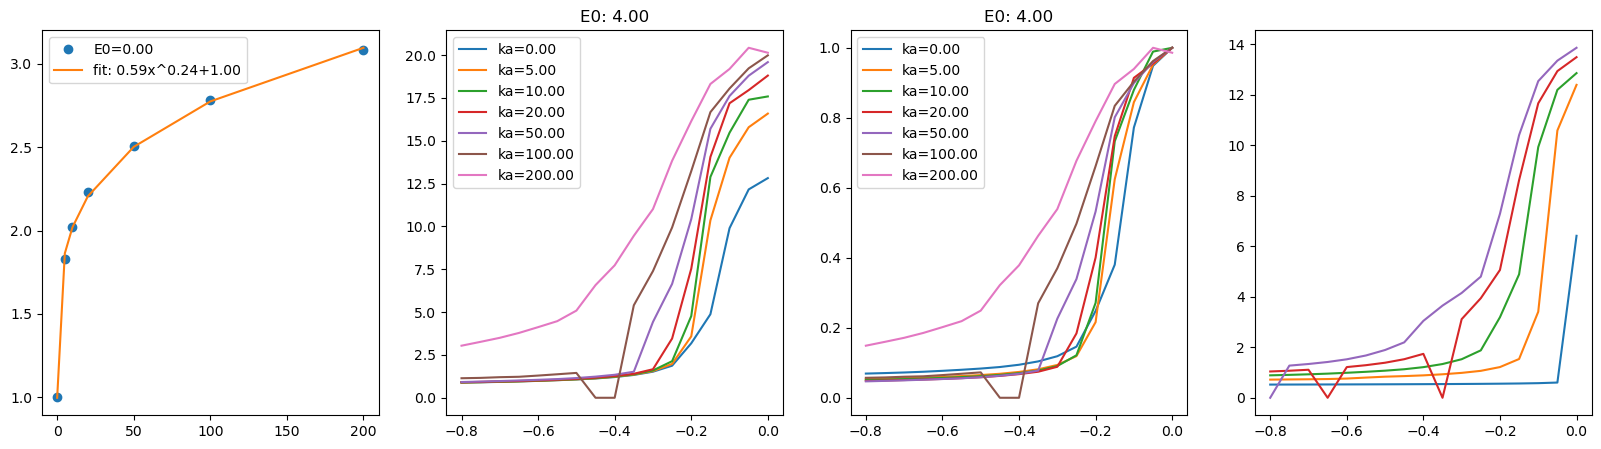

In [85]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

for ecut in [0.0]:
    for chi in [0.0]:
        ax[0].plot(np.unique(kavals), [rg[f'{ka:.2f}_{chi:.2f}_{ecut:.2f}'].mean()/rg[f'{0.0:.2f}_{chi:.2f}_{ecut:.2f}'].mean() for ka in np.unique(kavals)],'o', label=f"E0={ecut:.2f}")
        popt, pcov = curve_fit(fit_fn,np.unique(kavals), [rg[f'{ka:.2f}_{chi:.2f}_{ecut:.2f}'].mean()/rg[f'{0.0:.2f}_{chi:.2f}_{ecut:.2f}'].mean() for ka in np.unique(kavals)], p0=[1, 0.5, 1])
        print(popt)
        ax[0].plot(np.unique(kavals), fit_fn(np.unique(kavals), *popt), label=f'fit: {popt[0]:.2f}x^{popt[1]:.2f}+{popt[2]:.2f}')

for ecut in [4.0]:
    for ka in np.unique(kavals):
        rg0=np.max([rg[f'{ka:.2f}_{xx:.2f}_{ecut:.2f}'].mean() for xx in np.unique(chivals)])
        ax[1].plot(np.unique(chivals), [rg[f'{ka:.2f}_{xx:.2f}_{ecut:.2f}'].mean() for xx in np.unique(chivals)], label=f"ka={ka:.2f}")
        ax[2].plot(np.unique(chivals), [rg[f'{ka:.2f}_{xx:.2f}_{ecut:.2f}'].mean()/rg0 for xx in np.unique(chivals)], label=f"ka={ka:.2f}")
    ax[1].set_title(f'E0: {ecut:.2f}')
    ax[2].set_title(f'E0: {ecut:.2f}')


for ecut in np.unique(ecutvals):
    for ka in [0.0,]:
        ax[3].plot(np.unique(chivals), [rg[f'{ka:.2f}_{xx:.2f}_{ecut:.2f}'].mean()/fit_fn(ka, *popt) for xx in np.unique(chivals)], label=f"E0={ecut:.2f}")
ax[2].legend()
ax[1].legend()
ax[0].legend()

In [88]:
def U_ev(r, E0=4.0, mu=5.0, rc=0.5):
    return 0.5 * E0 * (1 + np.tanh(mu*(rc-r)))

def f_contact(r, mu=5.0, rc=1.5):
    return 0.5 * (1 + np.tanh(mu*(rc-r)))

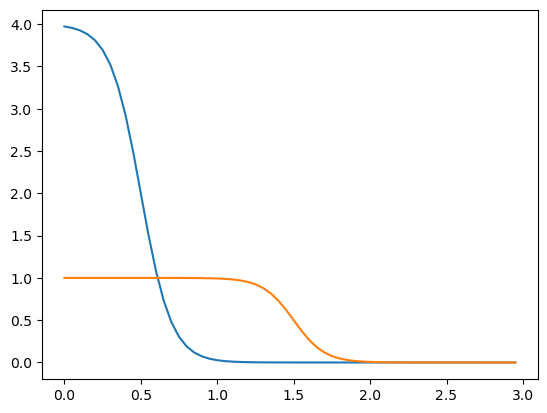

In [89]:
r=np.arange(0,3.0, 0.05)
plt.plot(r, U_ev(r))
plt.plot(r, f_contact(r))